# Density Based Clustering (DBSCAN)

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

Why DBSCAN? 

Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real-life data may contain irregularities, like:
1. Clusters can be of arbitrary shapes. 
2. Data may contain noise.

Parameters Required For DBSCAN Algorithm
1. eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an 2. 2. outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
2. MinPts: Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

In this algorithm, we have 3 types of data points.
1. Core Point: A point is a core point if it has more than MinPts points within eps. 
2. Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
3. Noise or outlier: A point which is not a core point or border point.
 
When Should We Use DBSCAN Over K-Means In Clustering Analysis?

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) and K-Means are both clustering algorithms that group together data that have the same characteristic. However, They work on different principles and are suitable for different types of data. We prefer to use DBSCAN when the data is not spherical in shape or the number of classes is not known beforehand.

In [1]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [2]:
# Generating synthetic data for clustering
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

In [3]:
X

array([[ 0.71541261, -0.49408918],
       [ 0.24678948, -0.24009066],
       [ 0.94326068,  0.3467999 ],
       [ 0.9737422 , -0.49290076],
       [ 1.2397133 , -0.4114107 ],
       [-1.01268032,  0.19344083],
       [ 1.17510658, -0.47743648],
       [ 0.66579578, -0.40894853],
       [ 0.49964772,  0.85701497],
       [-0.70075928,  0.79482792],
       [ 1.94187893,  0.27689868],
       [ 0.92762623,  0.31189552],
       [ 0.22843668, -0.22577849],
       [ 1.44327842, -0.49090786],
       [ 0.92559406,  0.36730006],
       [-0.04467711,  1.00255268],
       [ 1.78183782,  0.00309463],
       [-0.38566633,  0.96042378],
       [ 1.09277388, -0.55390691],
       [ 0.06941497,  0.20050755],
       [ 0.37364784, -0.20572006],
       [-0.45723039,  0.8916486 ],
       [-0.88272211,  0.49107124],
       [-0.85741542,  0.44206644],
       [ 0.9793197 , -0.57945888],
       [-0.76876452,  0.60408967],
       [ 0.41433502, -0.3051615 ],
       [ 2.0081785 ,  0.24518153],
       [ 1.23828257,

### Training the DBSCAN Clustering model 

In [4]:
# Performing DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

In [5]:
# Extracting core samples and outliers
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = labels == -1  # DBSCAN labels outliers as -1

### Plotting Scatter plot of DBSCAN clustering 

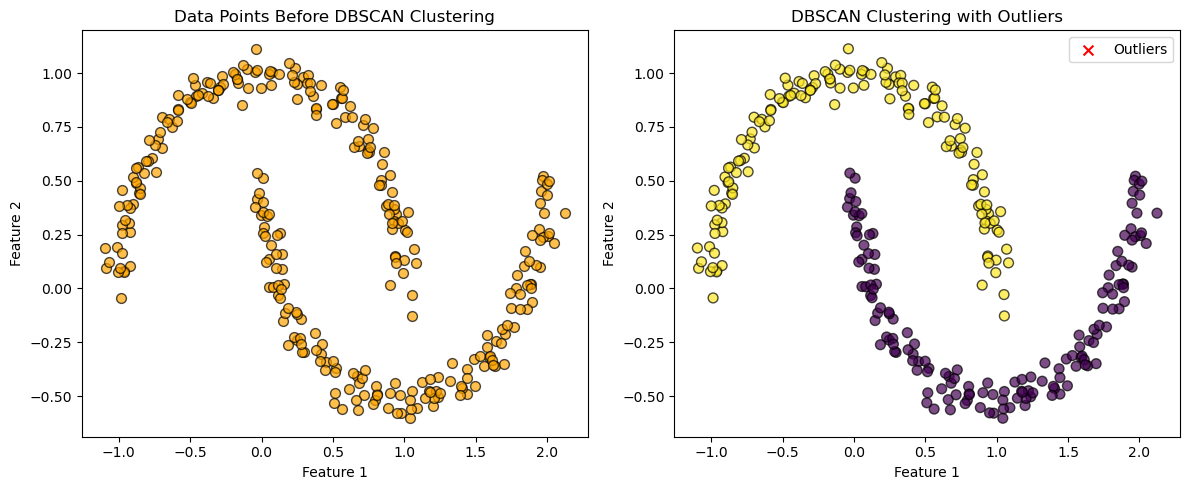

In [6]:
# Plotting data points before DBSCAN clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='orange', s=50, alpha=0.7, edgecolors='k')
plt.title('Data Points Before DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting the clusters after DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', marker='x', s=50, label='Outliers')
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()